In [2]:
import torch
from torch import nn

torch.__version__

'2.0.0a0'

In [7]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [8]:
# always start small and increase when necessary
# ml is an iterative process

In [17]:
import requests
import zipfile
from pathlib import Path

data_path = Path("data/")
images_path = data_path / "pizza_steak_sushi"

if images_path.is_dir():
    print(f"{images_path} directory exists.")
else:
    print(f"Did not find {images_path} directory, creating one...")
    images_path.mkdir(parents=True, exist_ok=True)
    
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...") 
        zip_ref.extractall(images_path)

data/pizza_steak_sushi directory exists.


In [11]:
# now, become one with the data!

In [18]:
import os
def walk_through_dir(dir_path: str):
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
walk_through_dir(images_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.


In [19]:
train_dir = images_path / "train"
test_dir = images_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

In [21]:
# now visualize, visualize, visualize!

Random image pat: data/pizza_steak_sushi/test/pizza/195160.jpg
Image class: pizza
CHW: RGB, 384, 512


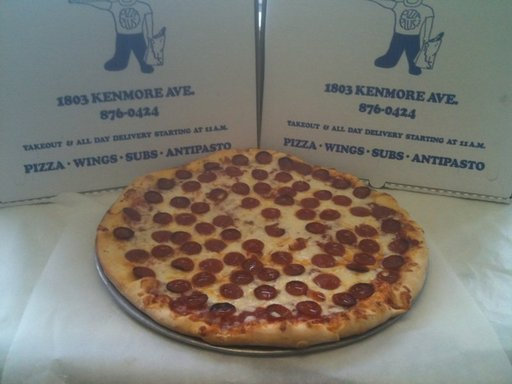

In [34]:
import random
from PIL import Image # python image library

random.seed(42)

images_path_list = list(images_path.glob("*/*/*.jpg"))

random_image_path = random.choice(images_path_list) # get a random image file from all the imgs

image_class = random_image_path.parent.stem # parent dir name

img = Image.open(random_image_path)

print(f"Random image pat: {random_image_path}")
print(f"Image class: {image_class}")
print(f"CHW: {img.mode}, {img.height}, {img.width}")
img

In [35]:
# to be able to compute with we need to 
# 1. turn data in tensors 
# 2. turn it into Dataset and DataLoader

In [38]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms # transforms is for formatting images
# data augmentation: the practice of altering data to make it harder for a model to learn

In [39]:
data_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5), # 50% probability of flip
    transforms.ToTensor() # pixel values to 0-255 and between 0.0 and 1.0
])